## Numpy를 활용한 머신러닝 구현 - K means 군집화

In [1]:
# 우선 실행해주세요
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

> 문제 1번부터 문제 5번은 아래의 표를 참고하며 풀어주세요!

* 다음 표는 여러 식품들의 100g당 kcal, 당도, 각 식품의 분류를 나타낸 표입니다. 현재 데이터셋을 k개의 클러스터로 numpy를 이용해 묶어주세요

| idx   | 이름       | 칼로리 | 당도 |
| ----- | ---------- | ------ | ---- |
| 1     | 딸기       | 22     | 9    |
| 2     | 수박       | 21     | 9    |
| 3     | 파프리카   | 18     | 1    |
| 4     | 헤이즐넛   | 586    | 3    |
| 5     | 포도       | 48     | 7    |
| 6     | 피스타치오 | 615    | 2    |
| 7     | 호두       | 650    | 3    |
| 8     | 귤         | 47     | 6    |
| 9     | 참외       | 31     | 8    |
| 10    | 오이     | 9      | 3    |
| 11    | 당근       | 34     | 3    |
| 12    | 상추       | 20     | 2    |
| 13    | 배         | 48     | 8    |
| 14    | 케일       | 21     | 2    |
| 15    | 아몬드     | 596    | 4    |
| 16    | 복숭아     | 41     | 9    |
| 17    | 바나나     | 81     | 10   |
| 18    | 호박씨     | 569    | 2    |
| 19    | 무우       | 13     | 3    |
| 20    | 잣         | 665    | 2    |
| 21    | 땅콩       | 575    | 4    |
| 22    | 사과       | 50     | 7    |
| 23    | 해바라기씨 | 611    | 2    |
| 24    | 백미       | 356     | 2    |
| 25    | 현미       | 350    | 2    |
| 26    | 배아미     | 354    | 2    |
| 27    | 오곡미     | 337    | 2    |
| 28    | 발아현미  | 340    | 2    |
| 29    | 보리       | 340    | 3    |



In [2]:
# 우선 실행해주세요
calories = np.array([22, 21, 18, 586, 48, 615, 650, 47, 
                     31, 9, 34, 20, 48, 21, 596, 41, 81, 
                     569, 13, 665, 575, 50, 611, 356, 350,
                     354, 337, 340, 340])

sweetness = np.array([9, 9, 1, 3, 7, 2, 3, 6, 8, 3, 3,
                      2, 8, 2, 4, 9, 10, 2, 3, 2, 4, 7, 2,
                     2, 2, 2, 2, 2, 3])

## 문제 1. 데이터 전처리
* 기존의 식품 dataset을 min-max normalization을 이용해 정규화된 dataset으로 바꿔주세요


* min-max normalization을 수행하는 식은 다음과 같습니다
$$x_{norm}~=~\frac{x-x_{min}}{x_{max}-x_{min}}$$

정답 >>>
```python
np.array([[0.01981707, 0.88888889],
       [0.01829268, 0.88888889],
       [0.01371951, 0.        ],
       [0.87957317, 0.22222222],
       [0.05945122, 0.66666667],
       [0.92378049, 0.11111111],
       [0.97713415, 0.22222222],
       [0.05792683, 0.55555556],
       [0.03353659, 0.77777778],
       [0.        , 0.22222222],
       [0.03810976, 0.22222222],
       [0.01676829, 0.11111111],
       [0.05945122, 0.77777778],
       [0.01829268, 0.11111111],
       [0.89481707, 0.33333333],
       [0.04878049, 0.88888889],
       [0.1097561 , 1.        ],
       [0.85365854, 0.11111111],
       [0.00609756, 0.22222222],
       [1.        , 0.11111111],
       [0.86280488, 0.33333333],
       [0.0625    , 0.66666667],
       [0.91768293, 0.11111111],
       [0.52896341, 0.11111111],
       [0.51981707, 0.11111111],
       [0.52591463, 0.11111111],
       [0.5       , 0.11111111],
       [0.50457317, 0.11111111],
       [0.50457317, 0.22222222]])
```

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer1`에 담아주세요

In [3]:
normalized_calories = (calories - calories.min()) / (calories.max() - calories.min())
normalized_sweetness = (sweetness - sweetness .min()) / (sweetness.max() - sweetness.min())
answer1 = np.stack((normalized_calories, normalized_sweetness), axis=1)

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [4]:
from numpy.testing import assert_array_almost_equal

assert 'answer1' in globals(), "결과를 answer1이라는 변수에 담아주세요!, answer1의 값을 보고 평가합니다."

A = np.array([[0.01981707, 0.88888889],
       [0.01829268, 0.88888889],
       [0.01371951, 0.        ],
       [0.87957317, 0.22222222],
       [0.05945122, 0.66666667],
       [0.92378049, 0.11111111],
       [0.97713415, 0.22222222],
       [0.05792683, 0.55555556],
       [0.03353659, 0.77777778],
       [0.        , 0.22222222],
       [0.03810976, 0.22222222],
       [0.01676829, 0.11111111],
       [0.05945122, 0.77777778],
       [0.01829268, 0.11111111],
       [0.89481707, 0.33333333],
       [0.04878049, 0.88888889],
       [0.1097561 , 1.        ],
       [0.85365854, 0.11111111],
       [0.00609756, 0.22222222],
       [1.        , 0.11111111],
       [0.86280488, 0.33333333],
       [0.0625    , 0.66666667],
       [0.91768293, 0.11111111],
       [0.52896341, 0.11111111],
       [0.51981707, 0.11111111],
       [0.52591463, 0.11111111],
       [0.5       , 0.11111111],
       [0.50457317, 0.11111111],
       [0.50457317, 0.22222222]])

assert_array_almost_equal(A,answer1,decimal=2,
                          err_msg="\n\n정답은 \n{}\n입니다. 코드를 다시 확인해주세요".format(A))

print("정답입니다!!!")

정답입니다!!!


<br>

* 참고 : 아래 이미지는 데이터 전처리 전과 후의 차이입니다. 대략적으로 나누어진 cluster가 눈에 띄며 k값을 설정하기 편해졌습니다.

![Imgur](https://i.imgur.com/HI8u0rh.png)

* dataset을 보면 올바르게 군집화하기 위해 k의 값은 4로 설정해주는 것이 좋을 것이라고 대략적으로 알 수 있습니다. initial centroid의 값은 아래와 같습니다

In [5]:
# 우선 실행해주세요
k = 4

center_x = [0.29171613, 0.71890069, 0.5528841, 0.87281559]
center_y = [0.31778485, 0.50367214, 0.56812419, 0.54525855] 
centroids = np.stack([center_x,center_y],axis=-1)

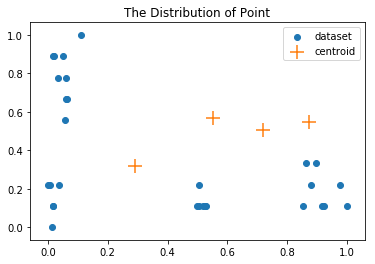

In [6]:
# dataset과 centroid를 시각화하는 코드

plt.title("The Distribution of Point")
plt.scatter(answer1[:,0],answer1[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

## 문제 2. 중심점과 각 데이터 사이의 거리 계산하기

* `유클리드 거리`를 사용해 중심점과 각 데이터 간 거리를 구해주세요. dataset은 `norm_data`를 사용해주세요

정답 >>>
```python
np.array([[0.63252583, 0.6331826 , 0.42221953, 0.59557377, 0.4191247 ,
        0.66499578, 0.69204774, 0.33345516, 0.52749424, 0.30696989,
        0.27101367, 0.34396271, 0.5153062 , 0.34274541, 0.60330134,
        0.62062674, 0.70606442, 0.5987431 , 0.30118131, 0.73782117,
        0.57130037, 0.41744288, 0.6592029 , 0.31464314, 0.30780525,
        0.31235072, 0.29342155, 0.29668528, 0.23332453],
       [0.79819161, 0.79952706, 0.86658301, 0.32408286, 0.67929435,
        0.44280909, 0.38196672, 0.66300704, 0.73814488, 0.77203125,
        0.7366752 , 0.80442157, 0.7141481 , 0.80309137, 0.24487116,
        0.77295086, 0.78574708, 0.41504679, 0.76635655, 0.48282604,
        0.22298817, 0.67633504, 0.44002107, 0.4360967 , 0.4401573 ,
        0.43743317, 0.44946821, 0.44725881, 0.35376594],
       [0.62213379, 0.62344043, 0.78323914, 0.47578768, 0.50317654,
        0.58857887, 0.54739042, 0.49511683, 0.56006827, 0.65217252,
        0.62019416, 0.70447222, 0.53612558, 0.70331283, 0.41478296,
        0.59750351, 0.61877229, 0.54710713, 0.64701135, 0.63935404,
        0.38881568, 0.50018715, 0.58475562, 0.45763867, 0.45820779,
        0.45780815, 0.46006269, 0.45955946, 0.34925938],
       [0.91961311, 0.92102726, 1.01752295, 0.323107  , 0.82237554,
        0.43712861, 0.33946256, 0.81495382, 0.8708929 , 0.93067692,
        0.89503424, 0.95984424, 0.84594727, 0.95848495, 0.21306422,
        0.89281334, 0.88828463, 0.43456989, 0.92496087, 0.45239349,
        0.21216152, 0.81936029, 0.43645971, 0.55382156, 0.5595462 ,
        0.5557196 , 0.57225472, 0.56928594, 0.48985197]])

```

In [7]:
# 우선 실행해주세요
norm_data = answer1.copy()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer2`에 담아주세요

In [8]:
diff_mat = (centroids.reshape(-1,1,2) - norm_data.reshape(1,-1,2))
answer2 = np.sqrt((diff_mat**2).sum(axis=-1))

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [9]:
from numpy.testing import assert_array_almost_equal

assert 'answer2' in globals(), "결과를 answer2라는 변수에 담아주세요!, answer2의 값을 보고 평가합니다."

A = np.array([[0.63252583, 0.6331826 , 0.42221953, 0.59557377, 0.4191247 ,
        0.66499578, 0.69204774, 0.33345516, 0.52749424, 0.30696989,
        0.27101367, 0.34396271, 0.5153062 , 0.34274541, 0.60330134,
        0.62062674, 0.70606442, 0.5987431 , 0.30118131, 0.73782117,
        0.57130037, 0.41744288, 0.6592029 , 0.31464314, 0.30780525,
        0.31235072, 0.29342155, 0.29668528, 0.23332453],
       [0.79819161, 0.79952706, 0.86658301, 0.32408286, 0.67929435,
        0.44280909, 0.38196672, 0.66300704, 0.73814488, 0.77203125,
        0.7366752 , 0.80442157, 0.7141481 , 0.80309137, 0.24487116,
        0.77295086, 0.78574708, 0.41504679, 0.76635655, 0.48282604,
        0.22298817, 0.67633504, 0.44002107, 0.4360967 , 0.4401573 ,
        0.43743317, 0.44946821, 0.44725881, 0.35376594],
       [0.62213379, 0.62344043, 0.78323914, 0.47578768, 0.50317654,
        0.58857887, 0.54739042, 0.49511683, 0.56006827, 0.65217252,
        0.62019416, 0.70447222, 0.53612558, 0.70331283, 0.41478296,
        0.59750351, 0.61877229, 0.54710713, 0.64701135, 0.63935404,
        0.38881568, 0.50018715, 0.58475562, 0.45763867, 0.45820779,
        0.45780815, 0.46006269, 0.45955946, 0.34925938],
       [0.91961311, 0.92102726, 1.01752295, 0.323107  , 0.82237554,
        0.43712861, 0.33946256, 0.81495382, 0.8708929 , 0.93067692,
        0.89503424, 0.95984424, 0.84594727, 0.95848495, 0.21306422,
        0.89281334, 0.88828463, 0.43456989, 0.92496087, 0.45239349,
        0.21216152, 0.81936029, 0.43645971, 0.55382156, 0.5595462 ,
        0.5557196 , 0.57225472, 0.56928594, 0.48985197]])

assert_array_almost_equal(A,answer2,decimal=2,
                          err_msg="\n\n정답은 \n{}\n입니다. 코드를 다시 확인해주세요".format(A))

print("정답입니다!!!")

정답입니다!!!


## 문제 3. 데이터를 거리가 가장 가까운 군집으로 할당하기

* 각 데이터를 `argmin`을 사용하여 거리가 가장 가까운 군집으로 할당해주세요. 거리가 저장되어있는 `dists`를 활용해주세요

정답 >>>
```python
np.array([2, 2, 0, 3, 0, 3, 3, 0, 0, 0, 
          0, 0, 0, 0, 3, 2, 2, 1, 0, 3, 
          3, 0, 3, 0, 0, 0, 0, 0, 0])
```

In [10]:
# 우선 실행해주세요
dists = answer2.copy()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer3`에 담아주세요

In [11]:
answer3 = dists.argmin(axis=0)

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [12]:
from numpy.testing import assert_array_equal

assert 'answer3' in globals(), "결과를 answer3이라는 변수에 담아주세요!, answer3의 값을 보고 평가합니다."

A = np.array([2, 2, 0, 3, 0, 3, 3, 0, 0, 0, 
          0, 0, 0, 0, 3, 2, 2, 1, 0, 3, 
          3, 0, 3, 0, 0, 0, 0, 0, 0])

assert_array_equal(A,answer3, err_msg="\n\n정답은 \n{}\n입니다. 코드를 다시 확인해주세요".format(A))

print("정답입니다!!!")

정답입니다!!!


## 문제 4. 각 군집 별 점들의 평균을 계산한 후, 군집의 중심점을 다시 계산하기

* 각 군집별 점들의 평균을 계산한뒤, 갱신된 중심점을 `answer4`에 담아주세요. dataset인 `norm_data`와 할당된 군집의 index가 저장되어있는 `cluster_per_point`를 활용해주세요

정답 >>>
```python
np.array([[0.20292324, 0.30065359],
       [0.85365854, 0.11111111],
       [0.04916159, 0.91666667],
       [0.9222561 , 0.20634921]])
```

In [13]:
# 우선 실행해주세요
cluster_per_point = answer3.copy()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer4`에 담아주세요

In [14]:
for i in range(k):
    target_point = norm_data[cluster_per_point==i]
    centroids[i] = target_point.mean(axis=0)

answer4 = centroids

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [15]:
from numpy.testing import assert_array_almost_equal

assert 'answer4' in globals(), "결과를 answer4라는 변수에 담아주세요!, answer4의 값을 보고 평가합니다."

A = np.array([[0.20292324, 0.30065359],
       [0.85365854, 0.11111111],
       [0.04916159, 0.91666667],
       [0.9222561 , 0.20634921]])

assert_array_almost_equal(A,answer4,decimal=2,
                          err_msg="\n\n정답은 \n{}\n입니다. 코드를 다시 확인해주세요".format(A))

print("정답입니다!!!")

정답입니다!!!


<br>

* 첫 번째 중심점 갱신 후의 모습을 확인해 보도록 하겠습니다

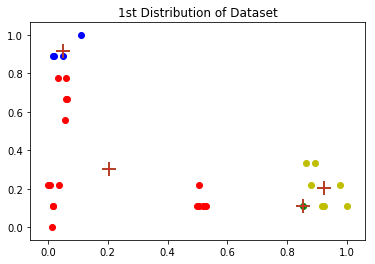

In [16]:
# 첫 번째 중심점 갱신 후의 모습을 시각화하는 코드 
centroids = answer4.copy()

plt.title("1st Distribution of Dataset")
for idx, color in enumerate(['r','g','b','y']):
    mask = (cluster_per_point==idx)
    plt.scatter(norm_data[mask,0],norm_data[mask,1],
                label='dataset', c=color)
    plt.scatter(centroids[:,0],centroids[:,1],
                s=200, label="centroid", marker='+')
plt.show()

## 문제 5. 위의 과정을 반복하며 군집이 바뀌지 않을 때까지 코드 작성하기

* `while`을 이용해 문제 2 ~ 문제 4 까지의 과정을 반복하며 군집이 바뀌지 않으면 이 과정을 끝내는 코드를 작성한 후 군집화된 후의 중심점을 `answer5`에 담아주세요
<br>

* 주의 : 변수명

    위에서 설정한 변수명에 주의해주세요! `norm_data`에는 normalize된 데이터가, `cluster_per_point`에는 할당된 군집의 index가, `centroid`에는 갱신되는 중심점이 저장되어 있다는 것을 기억하세요!
    
정답 >>>
```python
np.array([[0.01549797, 0.14814815],
       [0.51397358, 0.12962963],
       [0.05216802, 0.79012346],
       [0.9136814 , 0.19444444]])
```

In [17]:
# 우선 실행해주세요
num_data = norm_data.shape[0]
cluster_per_point = np.ones((num_data,))
centroids = answer4.copy()

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과는 `answer5`에 담아주세요

In [18]:
while True:
    prev_cluster_per_point = cluster_per_point
    
    diff_mat = (centroids.reshape(-1,1,2) - norm_data.reshape(1,-1,2))
    dists = np.sqrt((diff_mat**2).sum(axis=-1))
    cluster_per_point = dists.argmin(axis=0)

    for i in range(k):
        centroids[i] = norm_data[cluster_per_point==i].mean(axis=0)
        
    if np.all(prev_cluster_per_point == cluster_per_point):
        break

answer5 = centroids

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [19]:
from numpy.testing import assert_array_almost_equal

assert 'answer5' in globals(), "결과를 answer5라는 변수에 담아주세요!, answer5의 값을 보고 평가합니다."

A = np.array([[0.01549797, 0.14814815],
       [0.51397358, 0.12962963],
       [0.05216802, 0.79012346],
       [0.9136814 , 0.19444444]])

assert_array_almost_equal(A,answer5,decimal=2,
                          err_msg="\n\n정답은 \n{}\n입니다. 코드를 다시 확인해주세요".format(A))

print("정답입니다!!!")

정답입니다!!!


<br>

* 참고 : 문제 1번 ~ 문제 5번 dataset의 군집화 과정을 시각화하면 아래와 같습니다

![Imgur](https://i.imgur.com/HK3hKgUh.png)

<br>

> 문제 6번 에서는 `sklearn`에서 제공하는 모든 방향으로 같은 성질을 가지는 가우시안 정규분포를 이용해 생성되는 가상데이터에 k-means를 적용하여 군집화를 해보겠습니다. 우선 sklearn의 `make_blobs`함수를 이용해 1500개의 표본데이터, 2개의 feature, 5개의 cluster가 있는 데이터를 생성했습니다.

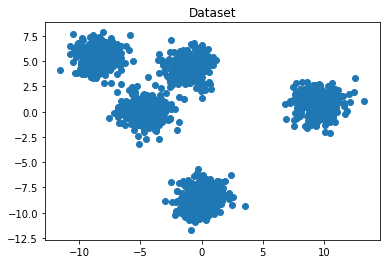

In [20]:
# 우선 실행해주세요
# make_blobs함수를 사용해 데이터 만들기 + 시각화
dataset = make_blobs(n_samples=1500, centers=5, n_features=2, random_state=7)
data = dataset[0]

plt.title("Dataset")
plt.scatter(data[:,0],data[:,1])
plt.show()

* dataset을 보면 올바르게 군집화하기 위해 k의 값은 5로 설정해주는 것이 좋을 것이라고 대략적으로 알 수 있습니다. initial centroid의 값은 아래와 같습니다

In [21]:
k = 5
center_x = np.array([-10.55622065, 10.10285564, -11.02050624, 1.24617742, 5.65952797])
center_y = np.array([-2.95530782, 6.58214255, 7.26614864, -3.77645254, 1.87389119])

centroids = np.stack([center_x,center_y],axis=-1)

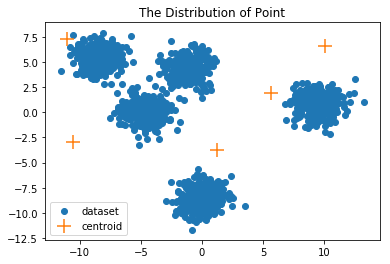

In [22]:
# dataset과 centroid를 시각화하는 코드

plt.title("The Distribution of Point")
plt.scatter(data[:,0],data[:,1],label='dataset')
plt.scatter(centroids[:,0],centroids[:,1],
            s=200, label="centroid", marker='+')
plt.legend()
plt.show()

## 문제 6. K means 군집화를 수행하는 함수 만들기

* 위의 data에 대해서, dataset을 넣었을 때 K means 군집화를 수행하여 마지막으로 갱신된 중심점을 return하는 함수를 만들어주세요

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 메소드 이름은 `cluster_kmeans`로 해주세요

In [23]:
def cluster_kmeans(dataset):    
    k = 5
    center_x = np.array([-10.55622065, 10.10285564, -11.02050624, 1.24617742, 5.65952797])
    center_y = np.array([-2.95530782, 6.58214255, 7.26614864, -3.77645254, 1.87389119])
    centroids = np.stack([center_x,center_y],axis=-1)
    
    ############
    # CODE HERE!
    ############
    num_data = dataset.shape[0]
    cluster_per_point = np.zeros((num_data))
    while True:
        prev_cluster_per_point = cluster_per_point
         
        diff_mat = (centroids.reshape(-1,1,2) - dataset.reshape(1,-1,2))
        dists = np.sqrt((diff_mat**2).sum(axis=-1))
        
        cluster_per_point = dists.argmin(axis=0)
        for i in range(k):
            centroids[i] = dataset[cluster_per_point==i].mean(axis=0)
            
        if np.all(prev_cluster_per_point == cluster_per_point):
            break
    return centroids

#### 정답 확인
* 정답을 입력한 후, 아래를 실행시키면 정답인지 확인합니다.

In [24]:
from numpy.testing import assert_array_almost_equal

assert 'cluster_kmeans' in globals(), "메소드 명을 cluster_kmeans로 해주세요"
f = cluster_kmeans
A = np.array([[-4.62315405e+00, -6.39017350e-03],
       [ 9.50429749e+00,  7.52999743e-01],
       [-8.47740714e+00,  5.48992626e+00],
       [-3.51929993e-02, -8.51635050e+00],
       [-1.15457051e+00,  4.36480779e+00]])

assert_array_almost_equal(A,f(data),decimal=2,
                          err_msg="\n\ncluster_kmeans함수에 sklearn에서 불러온 데이터를 넣었을 때의 정답은 \n{}\n입니다.".format(A))

print("정답입니다!!")

정답입니다!!


<br>

* 참고 : 문제 6번 dataset의 군집화 과정을 시각화하면 아래와 같습니다

![Imgur](https://i.imgur.com/ZyzFP0Ih.png)